<a href="https://colab.research.google.com/github/HarlanV/DadosEnergiaFossil/blob/main/DioCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot") #Configuração de plots

In [3]:
#https://www.gapminder.org/data/
df = pd.read_csv("/content/eg_use_comm_fo_zs.csv")

In [4]:
df.rename(columns={"country":"Pais"}, inplace=True)

In [5]:
#Ultimos 10 anos, descartando 2014
df = df.set_index('Pais').iloc[:, -11:-1]

In [6]:
#Países a serem discartados
df.loc[df.isnull().sum(axis=1)>=3,:].index.values.tolist()

['Antigua and Barbuda',
 'Bahrain',
 'Bahamas',
 'Belize',
 'Barbados',
 'Bhutan',
 'Comoros',
 'Cape Verde',
 'Djibouti',
 'Dominica',
 'Fiji',
 'Gibraltar',
 'Gambia',
 'Guinea-Bissau',
 'Equatorial Guinea',
 'Grenada',
 'Guyana',
 'Kiribati',
 'St. Kitts and Nevis',
 'St. Lucia',
 'Lesotho',
 'Maldives',
 'Marshall Islands',
 'Curaçao',
 'Oman',
 'Palau',
 'Qatar',
 'Solomon Islands',
 'South Sudan',
 'Sao Tome and Principe',
 'Eswatini',
 'Seychelles',
 'Timor-Leste',
 'Tonga',
 'St. Vincent and the Grenadines',
 'Vanuatu',
 'Samoa']

In [7]:
#Descartando países com mais de 30% de valores nulos
df = df.loc[df.isnull().sum(axis=1)<=3,:]
#Substituindo nulos pela média
df = df.T.fillna(df.mean(axis=1)).T

In [8]:
# Média por País
df.mean(axis=1).sort_values().sort_values(ascending=False)

Pais
Brunei                 100.000000
Oman                   100.000000
Trinidad and Tobago     99.880000
Saudi Arabia            99.820000
Algeria                 99.820000
                          ...    
Tanzania                11.685000
Zambia                   8.744444
Mozambique               8.121000
Ethiopia                 4.928000
Congo, Dem. Rep.         3.309000
Length: 137, dtype: float64

In [9]:
df.mean() # Média por Ano

2004    68.477815
2005    68.556642
2006    68.877956
2007    68.719124
2008    68.046259
2009    68.287067
2010    68.326004
2011    68.328819
2012    67.972628
2013    67.879862
dtype: float64

In [10]:
taxa = df["2013"] - df["2004"]
taxa = taxa.to_frame("Delta")

In [11]:
taxa.nlargest(5,"Delta") # Diferença no consumo comparado 2013 e 2004

,Delta
Pais,
Cameroon,23.0
Angola,21.2
Ghana,14.9


In [12]:
taxa.nsmallest(5,"Delta")

,Delta
Pais,
North Korea,-27.7
Uruguay,-17.0
Estonia,-15.8


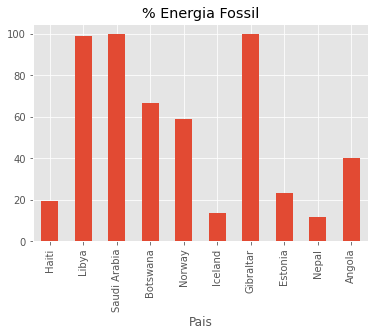

In [17]:
df.mean(axis=1).sort_values(ascending=False).sample(10).plot.bar(title = "% Energia Fossil")
plt.show()

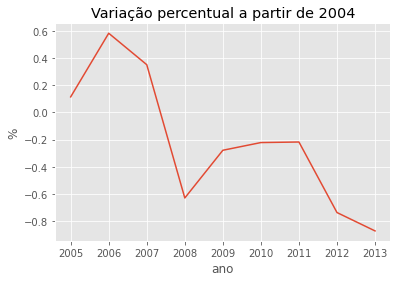

In [14]:
plt.style.use("ggplot")
ref = df.mean()["2004"]
((df.mean() - ref)/ref*100)[1:].plot()
plt.title("Variação percentual a partir de 2004")
plt.ylabel("%")
plt.xlabel("ano")
plt.show()

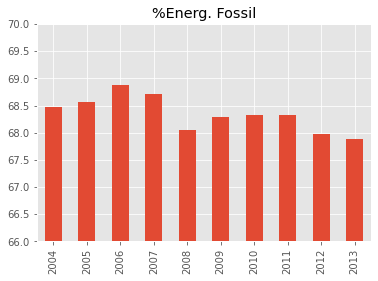

In [18]:
df.mean().plot.bar(ylim=[66,70], title="%Energ. Fossil")
plt.show()